importing dependencied

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
!pip install xgboost

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 5.2 MB/s eta 0:00:00


Importing the califonia house price dataset

In [9]:
# Load the California housing dataset
housing_price_dataset = fetch_california_housing()



In [10]:
# Convert to a Pandas DataFrame
df = pd.DataFrame(housing_price_dataset.data, columns=housing_price_dataset.feature_names)

# Add the target variable (house prices) as a new column
df['Target'] = housing_price_dataset.target

In [11]:
# Check the first few rows of the DataFrame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [12]:
#checking the number of rows and columns
df.shape

(20640, 9)

In [13]:
#check for missing values
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Target,0


In [14]:
df.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [15]:
#statistical measures of the data frame
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the correlation betweeen various featues in the dataset

1.Positive Correlation

2.Negative Correlation

In [16]:
correlation = df.corr()

In [17]:
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

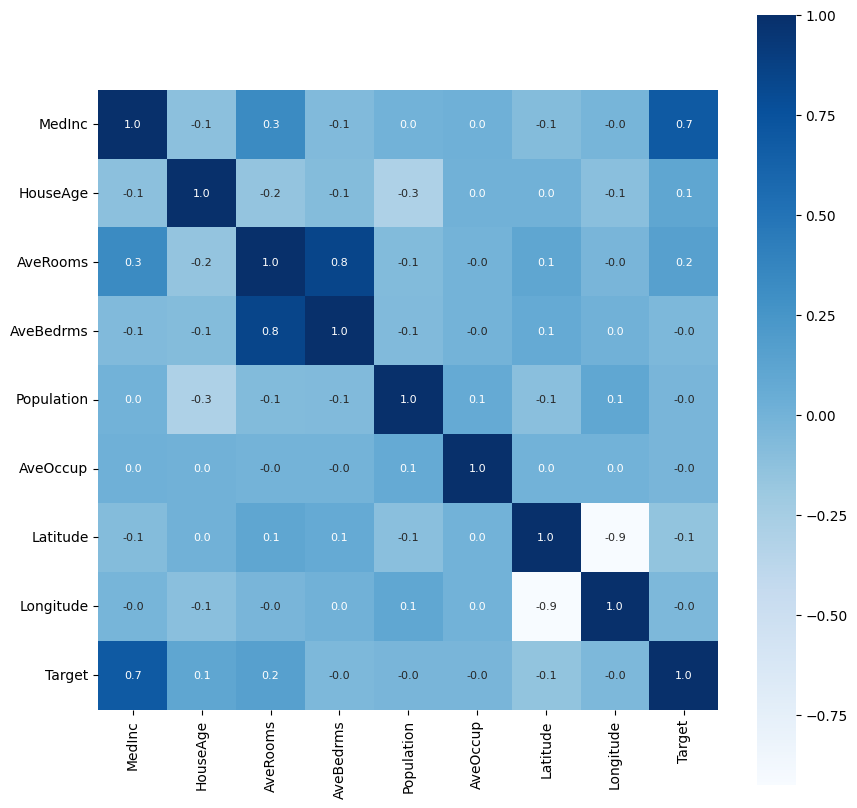

In [18]:
# constructing a heatmap to understand the correlation
plt.figure(figsize =(10,10))
sns.heatmap(correlation,cbar = True,square =True, fmt = '.1f',annot = True,annot_kws={"size":8},cmap ='Blues')
#cbar = for color bar in a side
#square =  we want all the values to be represented as squares
#fmt = how many decimal points
#annot = feature names and values
#annotation size
#cmap = color

Spliting the data and target

In [20]:
X = df.drop(['Target'],axis =1)
Y = df["Target"]

In [21]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
Y

,Target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


spliting the data into training data and test data

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

XGBoost Regressor

In [58]:
# Convert data to DMatrix, which is the internal format used by XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Regression objective (for continuous values)
    'eval_metric': 'rmse',  # Root Mean Squared Error as the evaluation metric
    'max_depth': 6,  # Maximum depth of a tree
    'learning_rate': 0.1,  # Step size
    'n_estimators': 100,  # Number of trees
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:17:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Predictions on training data

In [59]:
# Make predictions
Y_training_pred = model.predict(dtrain)

In [62]:
# Evaluate the model

#R squared error
score_1 = metrics.r2_score(Y_train, Y_training_pred)
print("R squared Error:", score_1)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, Y_training_pred)
print("Mean Absolute Error:", score_2)



R squared Error: 0.8984324665036486
Mean Absolute Error: 0.2550468104695142


Visualizing the actual Prices and predicted prices

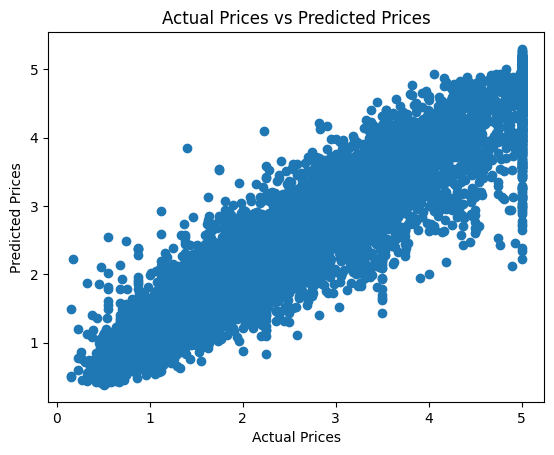

In [66]:
plt.scatter(Y_train,Y_training_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Predictions on testing data

In [64]:
# Make predictions
Y_test_pred = model.predict(dtest)

In [65]:
# Evaluate the model

#R squared error
score_1 = metrics.r2_score(Y_test, Y_test_pred)
print("R squared Error:", score_1)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_test, Y_test_pred)
print("Mean Absolute Error:", score_2)



R squared Error: 0.8297813081081081
Mean Absolute Error: 0.314446480354408
